In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys

sys.path.insert(0, '../src')
sys.path.insert(0, '../data')


import chocolate

%load_ext autoreload
%autoreload 2

In [4]:
chocolate_data = pd.read_csv("../data/Chocolate_bar_ratings_2022.csv")
chocolate_data.sample(10)

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
343,1462,Brasstown aka It's Chocolate,U.S.A.,2015,Dominican Republic,"Conacado, batch 001515",68%,"3- B,S,C","complex, brownie, lime, rich",3.75
1420,2562,Letterpress,U.S.A.,2021,U.S.A.,"Maui Kuia E., Hawaii, 2018-2019 h., batch 1",70%,"3- B,S,C",home baked banana nut bread,3.75
1989,959,Raaka,U.S.A.,2012,Madagascar,Madagascar,75%,"3- B,S,C","gritty, sticky, candied",3.25
2398,1239,Treehouse,U.S.A.,2014,Dominican Republic,Conacado,72%,"2- B,S","baked, roasty, coffee",3.00
1460,552,Machu Picchu Trading Co.,Peru,2010,Peru,Peru,55%,NaN,"extremely sweet, vanilla",2.25
817,2752,Ducrey,U.S.A.,2022,Nicaragua,"O'Payo, Wasalala Co-op",75%,"2- B,S","earthy, dirty",2.75
2582,883,Zotter,Austria,2012,Blend,"Indianer, Raw",58%,"4- B,S*,C,Sa","smooth, spicy, floral",3.50
771,2402,Diogo Vaz,Sao Tome & Principe,2019,Sao Tome,"Sao Tome, batch OST-18-01",65%,"4- B,S,C,L","complex, sweet, sour, grassy",3.00
1182,2614,Hemisphere,U.S.A.,2021,Nicaragua,"Matagalpa, El Tuma region",70%,"2- B,S","delicate fruit, black tea",3.25
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00


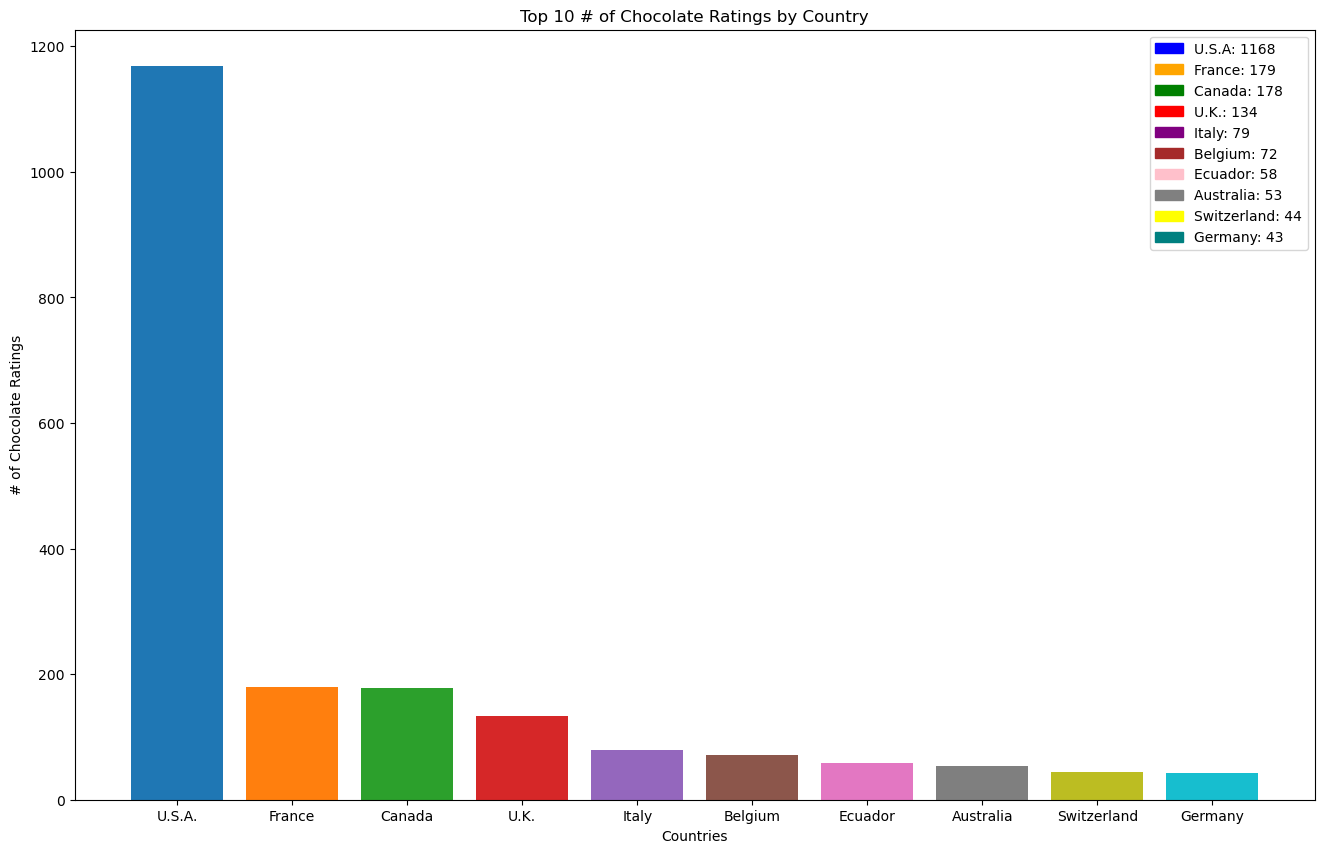

In [5]:
company_location = chocolate_data["Company Location"].value_counts().sort_values(ascending=False)

top_ten_countries = company_location[0:10]

fig, ax = plt.subplots()

c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
     '#bcbd22', '#17becf']
ax.bar(top_ten_countries.index, top_ten_countries.values, color = c)

ax.set_title("Top 10 # of Chocolate Ratings by Country")
ax.set_ylabel("# of Chocolate Ratings")
ax.set_xlabel("Countries")
united_states_legend = mpatches.Patch(color= 'blue', label='U.S.A: 1168')
france_legend = mpatches.Patch(color= 'orange', label='France: 179')
canada_legend = mpatches.Patch(color= 'green', label='Canada: 178')
uk_legend = mpatches.Patch(color= 'red', label='U.K.: 134')
italy_legend = mpatches.Patch(color= 'purple', label='Italy: 79')
belguim_legend = mpatches.Patch(color= 'brown', label='Belgium: 72')
ecuador_legend = mpatches.Patch(color= 'pink', label='Ecuador: 58')
australia_legend = mpatches.Patch(color= 'grey', label='Australia: 53')
switzerland_legend = mpatches.Patch(color= 'yellow', label='Switzerland: 44')
germany_legend = mpatches.Patch(color= 'teal', label='Germany: 43')
plt.legend(handles=[united_states_legend, france_legend, canada_legend, uk_legend, italy_legend, belguim_legend, ecuador_legend, australia_legend, switzerland_legend, germany_legend])
fig.set_size_inches(16, 10)


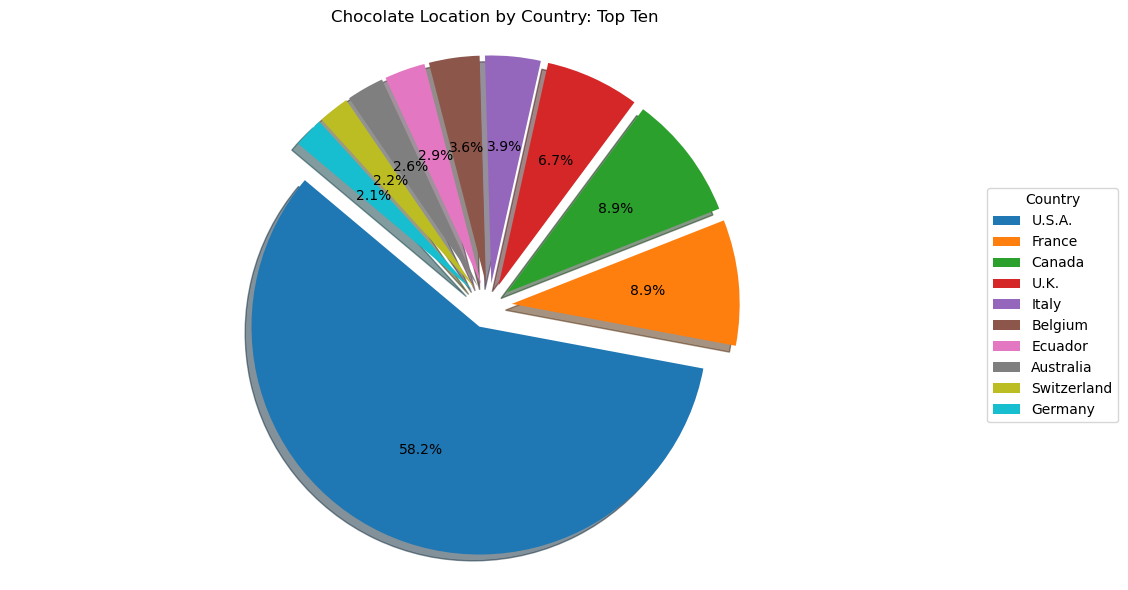

In [6]:
fig, ax = plt.subplots(figsize = (10,6))

sizes = top_ten_countries.values
labels = top_ten_countries.index.tolist()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
     '#bcbd22', '#17becf']
plt.pie(sizes, explode=explode, colors=c, 
        autopct='%1.1f%%', shadow=True, startangle=140)


ax.legend( labels, title="Country",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


ax.set_title("Chocolate Location by Country: Top Ten")

plt.tight_layout()
plt.axis('equal')
plt.show()

In [7]:
# def cocoa_percent()

chocolate_data['Remove Cocoa Percentage'] = chocolate_data['Cocoa Percent'].astype(str).str.replace('%', '')
chocolate_data['Cocoa Percentage as Float'] = chocolate_data['Remove Cocoa Percentage'].astype('float') / 100.0
chocolate_data['Cocoa Percentage as Float']
correlation = chocolate_data['Cocoa Percentage as Float'].corr(chocolate_data['Rating'], method ='spearman')

correlation

-0.10700879647699718

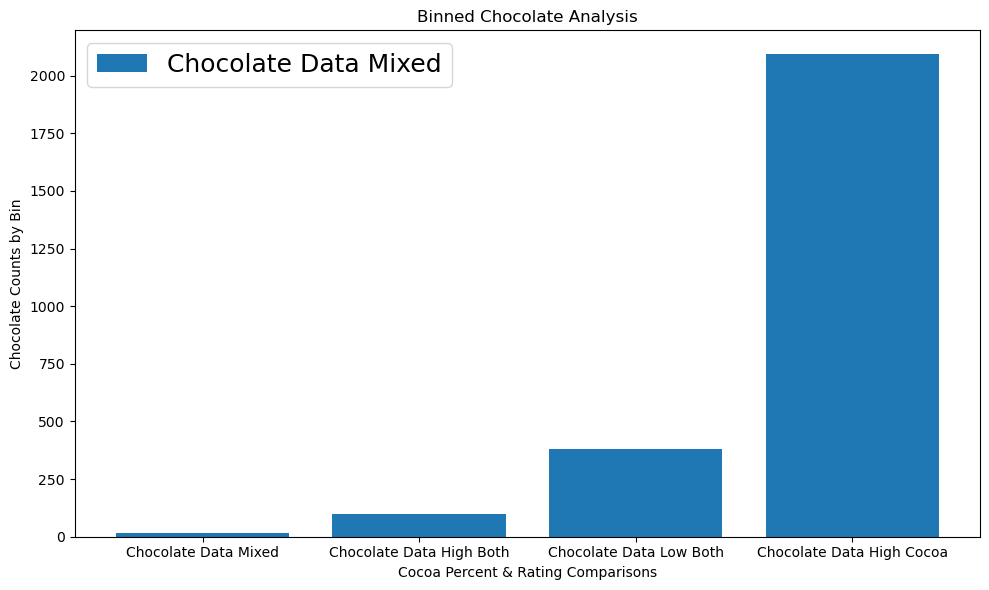

In [80]:
def cocoa_percent_and_rating(choco_df):
    chocolate_data_high_both = choco_df[(choco_df['Cocoa Percentage as Float'] >= 0.70) & (choco_df['Rating'] >= 4.00)].shape[0]
    chocolate_data_high_cocoa = choco_df[(choco_df['Cocoa Percentage as Float'] >= 0.70) & (choco_df['Rating'] < 4.00)].shape[0]
    chocolate_data_mixed = choco_df[(choco_df['Cocoa Percentage as Float'] < 0.70) & (choco_df['Rating'] >= 4.00)].shape[0]
    chocolate_data_low_both = choco_df[(choco_df['Cocoa Percentage as Float'] < 0.70) & (choco_df['Rating'] < 4.00)].shape[0]
    return {"Chocolate Data High Both":chocolate_data_high_both, "Chocolate Data High Cocoa":chocolate_data_high_cocoa,"Chocolate Data Mixed":chocolate_data_mixed, "Chocolate Data Low Both":chocolate_data_low_both}

# def sort_cocoa_data()
cocoa_and_rating_comparison = cocoa_percent_and_rating(chocolate_data)
cocoa_and_rating_comparison_sorted = dict(sorted(cocoa_and_rating_comparison.items(), key=lambda item: item[1]))



fig, ax = plt.subplots(figsize = (10,6))

cocoa_bins = list(cocoa_and_rating_comparison_sorted.keys())
cocoa_bin_counts = list(cocoa_and_rating_comparison_sorted.values())

plt.bar(range(len(cocoa_and_rating_comparison_sorted)), cocoa_bin_counts, tick_label=cocoa_bins, align = 'center')

ax.set_title("Binned Chocolate Analysis")
ax.set_ylabel("Chocolate Counts by Bin")
ax.set_xlabel("Cocoa Percent & Rating Comparisons")
ax.legend(cocoa_and_rating_comparison_sorted, prop={'size': 18})
fig.tight_layout()
plt.show()
